# Project 2 - Arctic ice maps

**Project deadline:** This project is due for submission on **Friday, 31.05.2024, 11:55pm**. Please check carefully the *About the Projects* section below for further details.

**Important:** You have the choice between two projects. Both have a scientific focus this time. We strongly advise you to read through both project notebooks completely before you take a decision.

## About the Projects
- You will get one project approximately every other week.
- Besides the homework-assignments, you need to solve the projects in order to pass the course. Your final course mark consists of the mean of your project marks. We aim to hand-out six projects during the term and we do not consider the worst project mark for your final course mark. Projects that you do not hand in are counted with a mark of 4.
- The project needs to be submitted by uploading this notebook to [Projects/Project 2](https://ecampus.uni-bonn.de/goto_ecampus_exc_3381147.html) on eCampus. You do not need to modify the notebooks name before your upload. Your project must be on eCampus by Friday, 31.05.2024, 11:55pm. **No late uploads can be accepted!**
- **In contrast to the homework exercises, each student must hand in an own solution for the projects! Of course you can and should discuss problems with each other! However, you need to be able to explain your solution in detail to your tutor and/or the lecturers! We might ask you for an interview about your project if the solution is (close to) identical to another students submission.**

**Note:** The tutors, Thomas and I are very happy to help you out with difficulties you might have with the project tasks! You can ask questions any time but please do so well in advance of the deadlines!

**Important:** Your notebook will be tested and graded from a *clean* state `(Kernel -> Reset Kernel and clear all Outputs)`. Please make sure that it cleanly runs from *top to bottom*!

### Your Name here please: Syed Ahmed Mazhar

## Introduction

The purpose of this project is to become familiar with working on image data, plotting it, and combining it in various ways for analysis. 

The data used in this problem set was/is collected by two different satellite missions. Involved are the AMSR-E instrument on the [Aqua](http://en.wikipedia.org/wiki/Aqua_%28satellite%29) satellite (data from 2002 to 2011) and the AMSR2 instrument on the [GCOM-W](https://suzaku.eorc.jaxa.jp/GCOM_W/) satellite (data from 2013 to-date). The data consist of maps of the concentration of ice in the Arctic collected between 2002 and 2023 with the exception of 2012. All the data were already downloaded and transformed for you to an easy-to-use format from [here](https://seaice.uni-bremen.de/start/data-archive/). One of the main issues to work on scientific data with Python is to first read them from various formats into `numpy`-arrays. We will come back to it in class but you do not need to worry about it here.

The data you should use are in the directory `/home/share/Project_2/ice_data` within our online-system. This is actually a (small) subset of the complete satellite data set, with only two ice maps every month (some are missing though). You should explore yourself the original data if you are interested to work with the full data set. I am very happy to help you with that! Although we only work with a small subset of available ice-maps, we would like to ask you *not* to copy them to your private space within our system but to work with them at their current location. We would like to avoid multiplying 400MB more than 100 times! If you would like to use the data on your own computer, there is a `tar`-archive at `/home/share/Project_2/ice_data_2024.tgz`.

The data is in `numpy` format, which means that you can read it as a `numpy`-array using:

    >>> import numpy as np
    >>> data = np.load('/home/share/Project_2/ice_data/20080415.npy')

which will give you a 2-d array. Just for information, this was created with:

    >>> np.save('ice_data/20080415.npy', data)
    
where `data` was a 2-d `numpy`-array that was extracted from the original data set.

**Note:** There is an ice-map for each first and each 15th of a month from the years 2003-2011 and 2013-2024 (a small amount of data is missing). For instance, the file `20080415.npy` represents data for the 15th of April 2008.

## Task 1 - getting familiar with the data and examining a single map 

**Please put the solution of this and the other tasks at the end of this notebook! You will submit the modified notebook to eCampus.**

Start off by reading in some  map as shown above, and plot it with Matplotlib (look up the `ax.imshow`-function). Note that to get the correct orientation, you will need to call the ``imshow`` command with the ``origin='lower'`` option, which ensures that the (0,0) pixels is on the bottom left, not the top left. You can try and use different colormaps if you like (set by the ``cmap`` option) - see [here](https://matplotlib.org/stable/tutorials/colors/colormaps.html) (scroll down on the page) for information on the available colormaps. You can specify a colormap to use with e.g. ``cmap=plt.cm.jet`` (i.e. ``cmap=plt.cm.`` followed by the name of the colormap). Note that you can make figures larger by specifying e.g.

    >>> fig, ax = plt.subplots(figsize=(8,8))

where the size is given in inches. Try and find a way to plot a colorbar on the side, to show what color corresponds to what value. Remember that you can always look at the [Matplotlib Gallery](https://matplotlib.org/stable/gallery/index.html) to find example plots for each `matplotlib`-feature. You can also try and remove the tick labels (``100``, ``200``, etc.) since they are not useful - but don't worry if you can't figure out how.

**Remarks:** (1) When you explore the data-values, you will notice that they contain numbers from 0 to 100. A value of 50 means that 50% of the area occupied by the corresponding pixel are covered with ice. A value of zero means that the complete pixel is covered with water; (2) Besides the numbers, a good deal of the pixels contains the special value `nan` (not a number). These are areas covered by land. Functions like `imshow` automatically ignore these values and do not produce an error. If you intend to do numerical calculations (`numpy`) with pixels that have a `nan`-value, the result is `nan` again by default. To ignore `nan`-values for building sums etc., you would need to use functions as `np.nansum` instead of `np.sum` etc.

I show below the result I obtain for this step (one winter and one summer map).


<img src="figs/ice_winter_summer.png" style="height: 300px;">

In [1]:
#Install cyberpunk for a cool plotting style and for the bonus points as mentioned in the lecture
!pip install mplcyberpunk

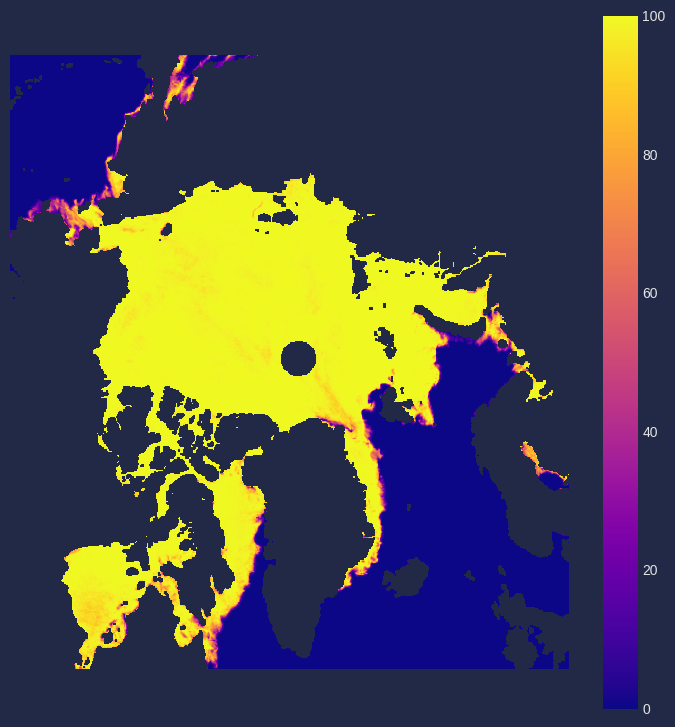

In [2]:
# The glob-module allows you to use Linux style pathname expansion
import glob
#Import the essential libraries
import numpy as np
import matplotlib.pyplot as plt
import mplcyberpunk

# Generate a list of files matching the Unix-pattern
# /home/share/Project_2/ice_data/2*. These are all
# necessary ice-data files for the project:
datapath = "/home/share/Project_2/ice_data"
filelist = np.sort(glob.glob(f"{datapath}/2*"))

# Load the first ice map data for visualization
data = np.load(filelist[0])

# Applying the cyberpunk style
plt.style.use("cyberpunk")

# Plotting the data
fig, ax = plt.subplots(figsize=(9,9))
im = ax.imshow(data, cmap='plasma', origin='lower')  # Change the colormap to 'plasma' for a cyberpunk feel

# Adding a colorbar to the plot
cbar = fig.colorbar(im, ax=ax)

#Removes the tick labels
ax.set_xticks([])
ax.set_yticks([])
plt.show()


## Task 2 - reading in and examining multiple maps 

We now want to make a plot of the ice concentration over time. Reading in a single map is easy, but since we have more than 350 maps, we do not want to read them all in individually by hand. Write a loop over all the available files, and inside the loop, read in the data to a variable (e.g. ``data``), and also extract the year, month, and day as integer values (e.g. ``year``, ``month``, and ``day``) from the filename. Then, also inside the loop, construct an array ``times`` which is essentially the fractional time in years. You can assume for simplicity that each month has 30 days and each year has 360 days - this will not affect the results later. As an example, in the year 2003, you would put the 1st of January as $2003.00$, the 2nd of January as $2003 + \frac{1}{360}\approx 2003.033$ and the 1st of February as $2003 + \frac{1}{12}\approx 2003.083$ into the `times`-array. Finally, also compute for each file the total number of pixels that have a value above 50% ice. Put also those values into an array. After the loop, make a plot of the number of pixels with a concentration above 50% against time.

**Hint:** To loop over files, you can use the`glob`-module. An example is shown in the following code cell: 

In [3]:

#Define a function to calculate the fractional time in years from the file name
def time_calculator(filename):
    # We skip the first 31 characters as is it the same for all files and simply provides the path. The characters 31:35 provides us the year, 35:37 provides us the month and 37:39 provides us the day.
    #We multiply with appropriate coefficients to get fractional time in years
    
    year= int(filename[31:35])
    month = int(filename[35:37])
    date = int(filename[37:39])
    
    fractional_year = year + ((month - 1) * 30 + date) / 360
    
    return fractional_year
    
   

In [4]:
'''Faster than using for loops and iterating over every element as using boolean or numpy arrays will run C/ C++ in the backend according to tutor, increasing speed
'''
# Define a function to calculate the number of pixels with ice concentration above a threshold
def pixel_value_calculator(array, threshold):
    return (array > threshold).sum()
    

In [5]:
# Figure out the number of files we are going to be looking out
print(len(filelist))


#Create empty arrays where we keep appending the desired values to be plot later
times= []
pixel_values = []
for _ in filelist: #Iterate over all the files
    data = np.load(_) #Read in a numpy array
    times.append(time_calculator(_)) #Calculate it's fractional time
    
    pixel_values.append(pixel_value_calculator(data, 50))
    

474


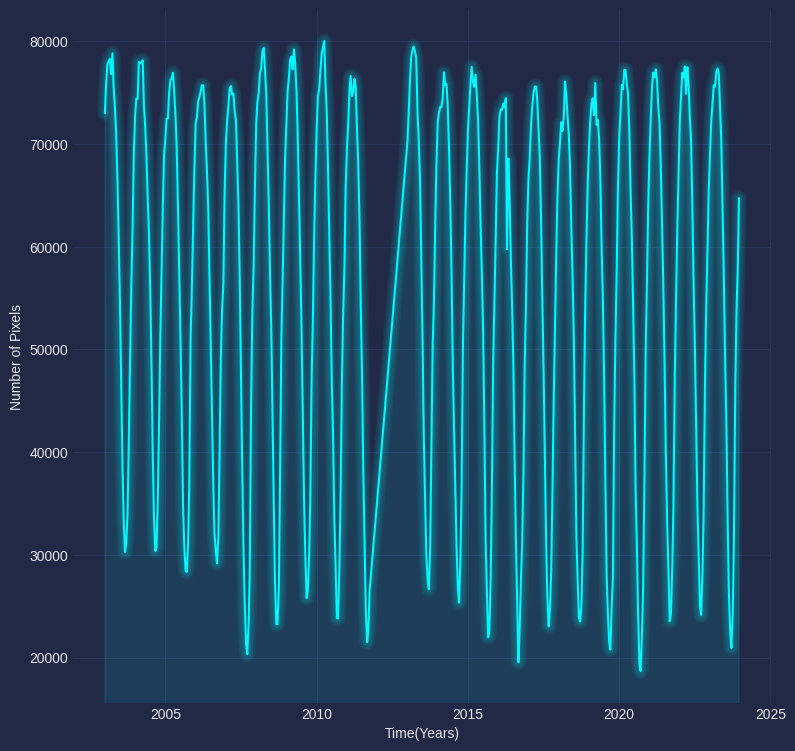

In [6]:
#Plotting

fig, ax = plt.subplots(figsize=(9,9))
ax.set_ylabel("Number of Pixels")
ax.set_xlabel("Time(Years)")

plt.plot(times, pixel_values)
# Adding some glow effects using mplcyberpunk
mplcyberpunk.add_glow_effects()
plt.show()

It makes sense that the graph is fluctuating as obviously there will be more ice in some seasons(such as winter compared to summer)

We now want something a little more quantitative than just the number of pixels, so we will try and compute the area where the ice concentration is above a given threshold. However, we first need to know the area of the pixels in the image, and since we are looking at a projection of a spherical surface, each pixel will be a different area. The areas (in km$^{2}$) are contained inside the file named ``ice_data_area.npy`` (within the `/home/share/Project_2` directory). Read in the areas and make a plot (with colorbar) to see how the pixel area is changing over the image.

Now, loop over the files again as before, but this time, for each file, compute the total area where the concentration of ice is 99% or above. Make a new plot showing the area of >99% ice concentration against time. Also plot the *total area* covered by ice as a function of time.

Describe what you see - how does the minimum value within each year change over time?

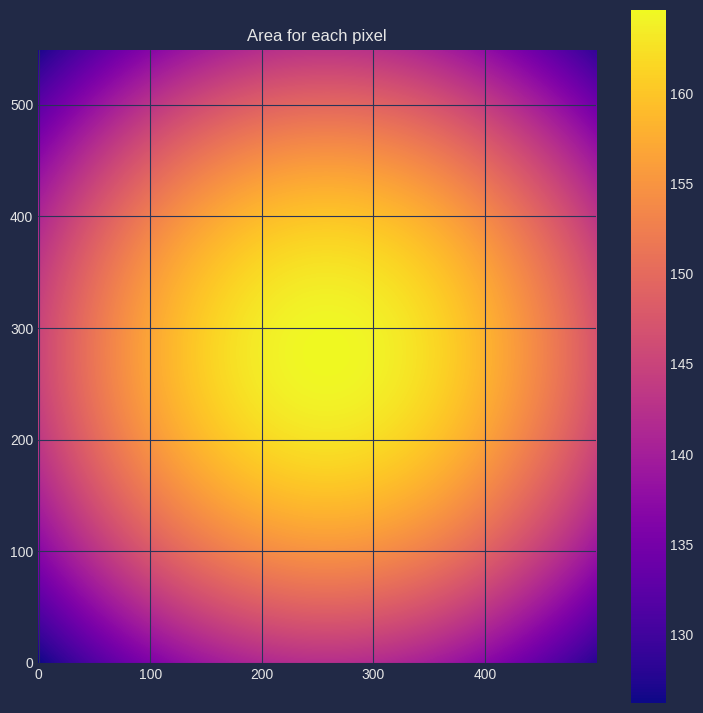

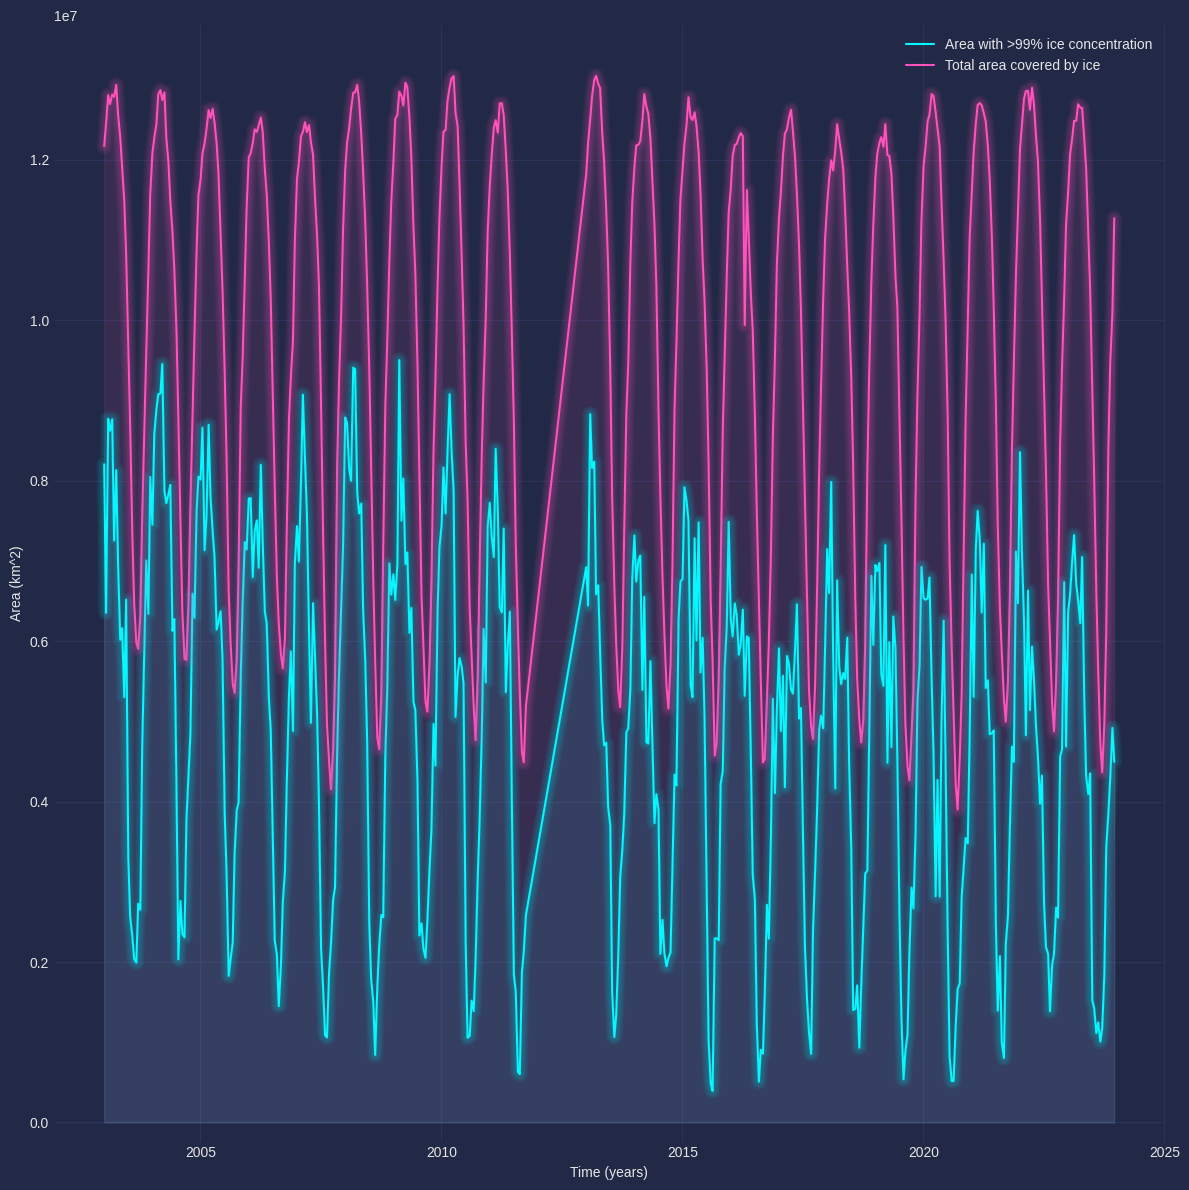

In [7]:
# Load pixel areas from the ice_data_area.npy file
pixel_areas = np.load("/home/share/Project_2/ice_data_area.npy")


#Plot to see how the pixel area is changing over the image
fig, ax = plt.subplots(figsize=(9,9))
im = ax.imshow(pixel_areas, cmap='plasma', origin='lower')  
ax.set_title("Area for each pixel")
cbar = fig.colorbar(im, ax=ax)

# Initialize lists to store data
times = []
total_99_area = []
total_area = []

# Loop over the files
for filename in filelist:
    # Read in the data
    data = np.load(filename)
    
    # Calculate fractional time in years
    times.append(time_calculator(filename))
    
    
    # Calculate total area where concentration is 99% or above
    total_99_area.append(np.sum(pixel_areas[data >= 99]))
    
    # Calculate total area covered by ice
    total_area.append(np.sum(pixel_areas[data >0]))

# Plotting
fig, ax = plt.subplots(figsize=(12, 12))

# Plot area of >99% ice concentration against time
ax.plot(times, total_99_area, label="Area with >99% ice concentration")
#Plot total area with ice over time
ax.plot(times, total_area, label="Total area covered by ice")
ax.set_xlabel("Time (years)")
ax.set_ylabel("Area (km^2)")
ax.legend()

mplcyberpunk.add_glow_effects()
plt.tight_layout()

plt.show()


Makes sense that the 99% data is more noisy as even the smallest changes can cause large fluctuations. The minimum value seems to go down over time

## Task 3 - visualizing changes over time; does the amount of ice decrease?

In the following we always work with the *total area* covered by ice from the previous task. 

Find the date at which the area of the region covered with ice is the smallest. What is the value of the minimum area?

**Hint:** Have a look at the `np.argmin` function.

Next, read in the map for this minimum, and the map for the same day and month but from 2003. Make a side-by-side plot showing the two ice-concentrations.

Compute the difference between the two maps so that a loss in ice over time will correspond to a negative value, and a gain in ice will correspond to a positive value. Make a plot of the difference, and use the ``RdBu`` colormap to highlight the changes (include a colorbar).

**Hint:** To make a plot with different sub-figures, check out the `fig, ax = plt.subplots` function. For sub-figures you will get an 2d-array of axes back. If you don't want to use a special plot, use `ax[...,...].remove()` to deactivate the plot!

Finally, plot the `mean` ice concentrations of the years 2004-2006 over the months January to December and compare it to the mean over the years 2021-2023. What was the loss of the ice over the past 17 years at the minimum values?

**Hint:** I showed you in the lecture how to easily do this when converting corresponding data to 2d `numpy`-arrays.

## Epilogue

The data that we have here cover more than the past twenty years and it is worth noting that the minimum ice coverage you found here was a record minimum - never before (in recorded history) had the size of the ice shelf been so small. This is part of a long term trend due to global warming. Many scientists believe that by ~2050, the Arctic will be completely ice-free for at least part of the summer.

Date at which area of the region covered with ice is the smallest: 2020.7083
Value of the minimum area: 3900626.2024 km²


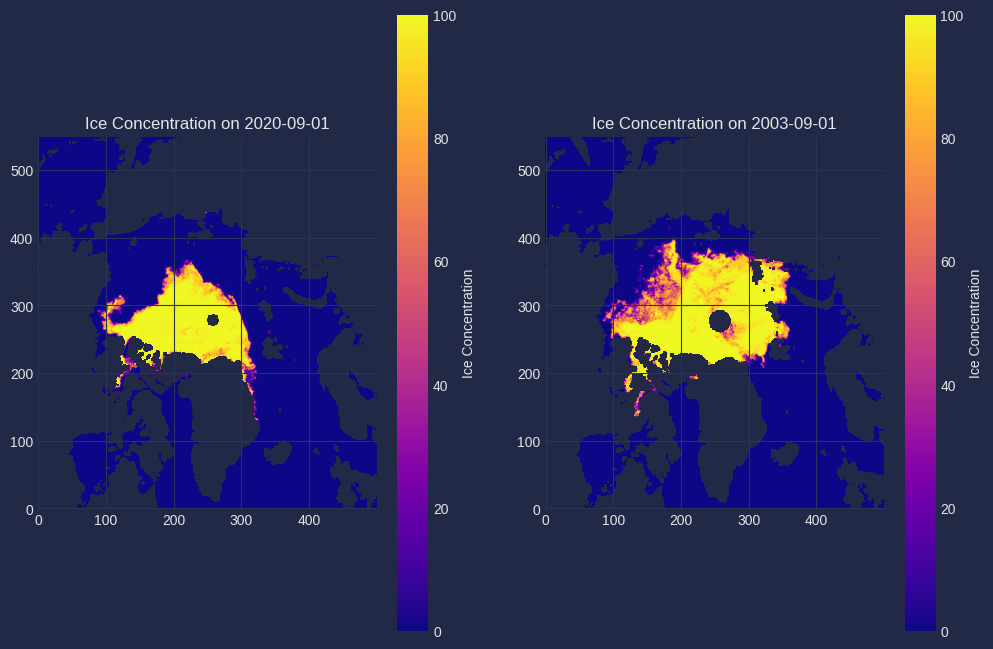

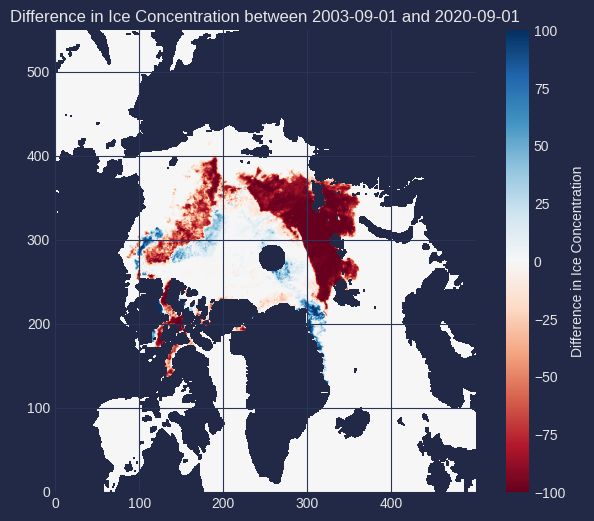

In [8]:
# Step 1: Find the date with the minimum total ice-covered area and its value
min_area_index = np.argmin(total_area)
min_area_date = times[min_area_index]
min_area_value = total_area[min_area_index]

print(f"Date at which area of the region covered with ice is the smallest: {min_area_date:.4f}")
print(f"Value of the minimum area: {min_area_value:.4f} km²")

# Step 2: Extract the year, month, and day from the fractional date
year_min = int(min_area_date)
fractional_month_day = (min_area_date - year_min) * 360
month_min = int(fractional_month_day // 30) + 1
day_min = int(fractional_month_day % 30)

# Ensure the day is either the 1st or the 15th
if day_min < 15:
    day_min = 1
else:
    day_min = 15

# Calculate the corresponding date 17 years earlier
year_2003 = year_min - 17
#zfill ensures to fill in a 0 before the character where date or month is given by only one character to make the whole format two characters
date_2003_str = f"{year_2003}{str(month_min).zfill(2)}{str(day_min).zfill(2)}"
date_2020_str = f"{year_min}{str(month_min).zfill(2)}{str(day_min).zfill(2)}"

# Format the dates for the titles for better readability
date_2003_title = f"{year_2003}-{str(month_min).zfill(2)}-{str(day_min).zfill(2)}"
date_2020_title = f"{year_min}-{str(month_min).zfill(2)}-{str(day_min).zfill(2)}"

# Construct the filename for this date in 2003
file_2003 = f"/home/share/Project_2/ice_data/{date_2003_str}.npy"

# Load the map data for the minimum area date and the corresponding date in 2003
min_area_data = np.load(filelist[min_area_index])
min_area_data_2003 = np.load(file_2003)

# Step 3: Create a side-by-side plot of these two ice-concentrations
fig, axs = plt.subplots(1, 2, figsize=(12, 8))

# Plot the map for the minimum area date
im1 = axs[0].imshow(min_area_data, cmap='plasma', origin='lower')
axs[0].set_title(f"Ice Concentration on {date_2020_title}")
cbar1 = fig.colorbar(im1, ax=axs[0])
cbar1.set_label('Ice Concentration')

# Plot the map for the corresponding date in 2003
im2 = axs[1].imshow(min_area_data_2003, cmap='plasma', origin='lower')
axs[1].set_title(f"Ice Concentration on {date_2003_title}")
cbar2 = fig.colorbar(im2, ax=axs[1])
cbar2.set_label('Ice Concentration')

plt.show()

# Step 4: Compute the difference between the two maps and plot it using the `RdBu` colormap
difference = min_area_data - min_area_data_2003

fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(difference, cmap='RdBu', origin='lower')
cbar = fig.colorbar(im, ax=ax)
cbar.set_label('Difference in Ice Concentration')
ax.set_title(f'Difference in Ice Concentration between {date_2003_title} and {date_2020_title}')
plt.show()


/tmp/ipykernel_616/29950419.py:21: RuntimeWarning: Mean of empty slice
  monthly_means[month - 1] += np.nanmean(month_data, axis=0)


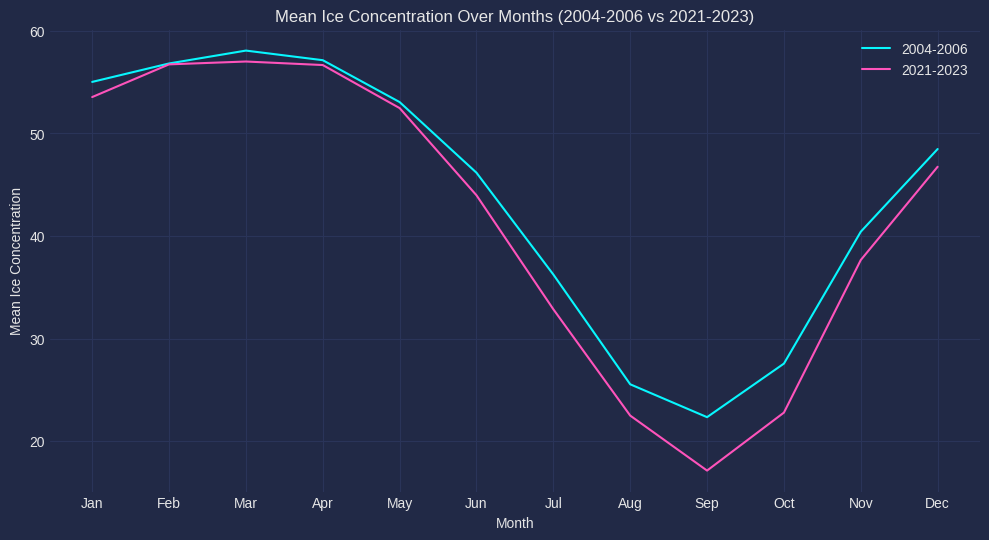

In [9]:
# Define the years of interest
years_2004_2006 = [2004, 2005, 2006]
years_2021_2023 = [2021, 2022, 2023]

# Helper function to load data and compute monthly means
def helper(years):
    monthly_means = np.zeros((12, 550, 500))  # Adjust the shape according to my data dimensions
    month_counts = np.zeros(12)
    
    for year in years:
        for month in range(1, 13):
            month_data = []
            for day in ['01', '15']:
                filename = f"/home/share/Project_2/ice_data/{year}{str(month).zfill(2)}{day}.npy"
                data = np.load(filename)
                month_data.append(data)
                
            if month_data:
                month_data = np.array(month_data)
                # Use np.nanmean instead of np.mean to deal with abundance of nan values
                monthly_means[month - 1] += np.nanmean(month_data, axis=0)
                month_counts[month - 1] += 1
    
    # Average the monthly data
    for month in range(12):
        if month_counts[month] > 0:
            monthly_means[month] /= month_counts[month]
    
    return monthly_means

# Compute the monthly means for the periods 2004-2006 and 2021-2023
monthly_means_2004_2006 = helper(years_2004_2006)
monthly_means_2021_2023 = helper(years_2021_2023)

# Calculate the mean ice concentration for each month

mean_ice_concentration_2004_2006 = np.nanmean(monthly_means_2004_2006, axis=(1, 2))
mean_ice_concentration_2021_2023 = np.nanmean(monthly_means_2021_2023, axis=(1, 2))

# Plot mean ice concentrations over the months
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.figure(figsize=(12, 6))
plt.plot(months, mean_ice_concentration_2004_2006, label='2004-2006')
plt.plot(months, mean_ice_concentration_2021_2023, label='2021-2023')
plt.xlabel('Month')
plt.ylabel('Mean Ice Concentration')
plt.title('Mean Ice Concentration Over Months (2004-2006 vs 2021-2023)')
plt.legend()
plt.grid(True)
plt.show()

